## Predicting Not News

We predict not news using URL structure.

Bakshy et al. for instance use the following logic:

	hard_lab    Indicates whether the url (below) matches the regex: 'politi|usnews|world|national|state|elect|vote|govern|campaign|war|polic|econ|unemploy|racis|energy|abortion|educa|healthcare|immigration'
	soft_lab    Indicates whether the url matches the regex: 'sports|entertainment|arts|fashion|style|lifestyle|leisure|celeb|movie|music|gossip|food|travel|horoscope|weather|gadget'


The scheme is based on U.S. data so not as useful for U.K. data. After carefully inspecting a random sample of thousand URLs, we came up with the following:
    
	hard_lab    Indicates whether the url (below) matches the regex: 'politi|world|national|state|elect|vote|govern|campaign|war|polic|econ|unemploy|energy|educa|healthcare|immigration'
	soft_lab    Indicates whether the url matches the regex: 'sports|entertainment|arts|fashion|style|lifestyle|leisure|celeb|movie|music|gossip|food|travel|horoscope|weather|gadget'

p.s. 'soft_lab' means not news.

### Read in the data

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 120)

In [2]:
df = pd.read_csv('/opt/notebooks/not_news/tabs/uk_news_media_data_subset_by_label.csv.gz', usecols=['label', 'url', 'text'])
df['src_name'] = df['label'].str.lower()
del df['label']
df.head()

,text,url,src_name
0,highpressur day work drink pint locallybrew real ale mani peopl prefer way relax anaesthetist aldebi near beccl turn...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjo...,beccles and bungay journal
1,weather forecast remain extrem cold come day suffolk counti council extend usual custom servic helplin oper weekend ...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjo...,beccles and bungay journal
2,elderli vulner peopl live council hous waveney protect new crackdown antisoci behaviour waveney district council new...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjo...,beccles and bungay journal
3,villag award energysav project set spend reduc fuel bill whole commun wenhaston south halesworth name one greenest v...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjo...,beccles and bungay journal
4,tuesday saw first beccl v bungay golf match year produc ace beccl play home led ladi captain sam cooper partner club...,http://www.becclesandbungayjournal.co.uk/content/bbjournal/sport/story.aspx?brand=BBJOnline&category=SPORT&tBrand=bb...,beccles and bungay journal


In [3]:
df.shape[0]

5392953

### Generate Labels

In [4]:
import re
hard_lab = re.compile('(politi|world|national|uk-news|scottish-news|news-eu|state|local|elect|vote|govern|campaign|war|polic|econ|unemploy|energy|educa|healthcare|immigration)')
soft_lab = re.compile('(sport|football|entertainment|culture|arts|fashion|style|lifestyle|life-style|leisure|celeb|movie|music|gossip|food|travel|horoscope|weather|gadget)')

### Create Training Data

In [5]:
sdf = df[df.text.notnull() & df.url.notnull()].sample(1000000, random_state=4).copy()
sdf.head()

,text,url,src_name
1294994,man name local geraint evan appear aberdar magistr court accus murder father paul bennett father two stab death grou...,http://www.peterboroughet.co.uk/viewarticle.aspx?articleid=2126845&sectionid=406,peterborough evening telegraph
2453364,lead polic chief today condemn armchair perfect health safeti taliban prevent offic carri job say put live risk sir ...,"http://www.guardian.co.uk/Politics/homeaffairs/story/0,,2206622,00.htm",the guardian
121854,west brom bolton took point live barclay premier leagu encount hawthorn wander went front midway second half thank s...,http://www.birminghammail.net/birmingham-sport/west-bromwich-albion-fc/west-bromwich-albion-fc-news/2010/10/02/west-...,birmingham mail
1077388,east england ambul servic norwich offic hellesdon east england ambul servic norwich offic hellesdon solar panel inst...,http://www.edp24.co.uk/solar_panels_installed_at_norwich_ambulance_control_room_1_225106,eastern daily press
2926234,wit say man went stab spree belgian nurseri face paint like joker two babi carer die attack ten children treat hospi...,http://www.belfasttelegraph.co.uk/breaking-news/world/europe/belgian-nursery-killer-painted-face-like-the-joker-1415...,belfast telegraph


In [6]:
# Free up memory
import gc
%xdel df
gc.collect()

0

In [7]:
def is_hard_lab(c):
    m = hard_lab.search(c)
    return 1 if m else None

sdf['hard_lab'] = sdf['url'].apply(lambda c: is_hard_lab(c))
sdf[sdf.hard_lab == 1].head()

,text,url,src_name,hard_lab
1294994,man name local geraint evan appear aberdar magistr court accus murder father paul bennett father two stab death grou...,http://www.peterboroughet.co.uk/viewarticle.aspx?articleid=2126845&sectionid=406,peterborough evening telegraph,1.0
2926234,wit say man went stab spree belgian nurseri face paint like joker two babi carer die attack ten children treat hospi...,http://www.belfasttelegraph.co.uk/breaking-news/world/europe/belgian-nursery-killer-painted-face-like-the-joker-1415...,belfast telegraph,1.0
2950250,monday januari local news member ahmadiyya muslim youth associ member ahmadiyya muslim youth associ member ahmadiyya...,http://www.croydonguardian.co.uk/news/localnews/10175440.Muslim_group_pitches_in_to_clear_snow/?ref=rs,croydon guardian,1.0
5005952,england face prospect follow india oval anoth lowerord bat collaps face task score final match seri ensur indian bat...,http://www.skegnesstoday.co.uk/latest-national-sport?articleid=310453,skegness today,1.0
3827845,polic today reveal lead forc new neighbourhood team follow costcut shakeup commun beat dian bradburi number individu...,http://www.newsandstar.co.uk/news/cumbria-police-reveals-inspectors-in-charge-of-force-s-new-local-teams-1.799776?re...,news & star,1.0


In [8]:
def is_soft_lab(c):
    m = soft_lab.search(c)
    return 1 if m else None

sdf['soft_lab'] = sdf['url'].apply(lambda c: is_soft_lab(c))
sdf[sdf.soft_lab == 1].head()

,text,url,src_name,hard_lab,soft_lab
121854,west brom bolton took point live barclay premier leagu encount hawthorn wander went front midway second half thank s...,http://www.birminghammail.net/birmingham-sport/west-bromwich-albion-fc/west-bromwich-albion-fc-news/2010/10/02/west-...,birmingham mail,NaN,1.0
5005952,england face prospect follow india oval anoth lowerord bat collaps face task score final match seri ensur indian bat...,http://www.skegnesstoday.co.uk/latest-national-sport?articleid=310453,skegness today,1.0,1.0
2184529,coast downhil gear cheaper honest john explain coast downhil gear cheaper fuel effici gearbox engag honest john bst ...,http://telegraph.feedsportal.com/c/32726/f/568313/s/161c1511/l/0L0Stelegraph0O0Cmotoring0Ccaradvice0Chonestjohn0C859...,the daily telegraph,NaN,1.0
3160926,villa seal collin deal sep aston villa complet sign west ham defend jame collin fouryear contract welsh intern put p...,http://www.examiner.co.uk/news/national-sport/2009/09/01/villa-seal-collins-deal-86081-24582146,the huddersfield daily examiner,1.0,1.0
5224091,late show delight lambert sunday januari nation sport news press associ skip social link print email tweet paul lamb...,http://www.somersetcountygazette.co.uk/uk_national_sport/9446365.Late_show_delights_Lambert/?ref=rs,somerset county gazette,1.0,1.0


### Filter on rows where hard and soft labels are different

We ignore URLs that have both keywords.

In [9]:
sdf.loc[(sdf.hard_lab == 1) & (sdf.soft_lab.isnull()), 'hard_soft'] = 1
sdf.loc[(sdf.hard_lab.isnull()) & (sdf.soft_lab == 1), 'hard_soft'] = 0

### Final Dataset

In [10]:
sdf = sdf[sdf.hard_soft.notnull()]
sdf = sdf.reset_index(drop=True)
sdf.head()

,text,url,src_name,hard_lab,soft_lab,hard_soft
0,man name local geraint evan appear aberdar magistr court accus murder father paul bennett father two stab death grou...,http://www.peterboroughet.co.uk/viewarticle.aspx?articleid=2126845&sectionid=406,peterborough evening telegraph,1.0,NaN,1.0
1,west brom bolton took point live barclay premier leagu encount hawthorn wander went front midway second half thank s...,http://www.birminghammail.net/birmingham-sport/west-bromwich-albion-fc/west-bromwich-albion-fc-news/2010/10/02/west-...,birmingham mail,NaN,1.0,0.0
2,wit say man went stab spree belgian nurseri face paint like joker two babi carer die attack ten children treat hospi...,http://www.belfasttelegraph.co.uk/breaking-news/world/europe/belgian-nursery-killer-painted-face-like-the-joker-1415...,belfast telegraph,1.0,NaN,1.0
3,monday januari local news member ahmadiyya muslim youth associ member ahmadiyya muslim youth associ member ahmadiyya...,http://www.croydonguardian.co.uk/news/localnews/10175440.Muslim_group_pitches_in_to_clear_snow/?ref=rs,croydon guardian,1.0,NaN,1.0
4,polic today reveal lead forc new neighbourhood team follow costcut shakeup commun beat dian bradburi number individu...,http://www.newsandstar.co.uk/news/cumbria-police-reveals-inspectors-in-charge-of-force-s-new-local-teams-1.799776?re...,news & star,1.0,NaN,1.0


In [11]:
sdf.shape[0]

372163

### Modeling

Split into train and test, and get non-sparse and moderately frequent bi- and tri-grams.

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(sdf, test_size=0.2, random_state=4)

#### Build the bi- and tri-grams that appear in more than 50 outlets

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
  min_df=50,
  ngram_range = (2, 3),
  binary=True,
  stop_words='english')
vectorizer.fit_transform(sdf.groupby('src_name')['text'].agg(lambda x:' '.join(x)))

<266x46711 sparse matrix of type '<class 'numpy.int64'>'
	with 3459361 stored elements in Compressed Sparse Row format>

In [14]:
vocab_set = set(vectorizer.vocabulary_)
len(vocab_set)

46711

In [15]:
# Now classify w sklearn:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import numpy as np
from time import time

# Create text features (and store efficiently as sparse matrix).
print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()

vectorizer = TfidfVectorizer(
  sublinear_tf=False,
  max_df=0.5,
  min_df=100,
  ngram_range = (2,3),
  use_idf=True,
  max_features=500000,
  stop_words='english')

def size_mb(docs):
      return sum(len(s.encode('utf-8')) for s in docs) / 1e6

t0 = time()
data_train_size_mb = size_mb(train_df['text'])
X_traintfidf = vectorizer.fit_transform(train_df['text'])
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_traintfidf.shape)

Extracting features from the training dataset using a sparse vectorizer
done in 1494.385205s at 0.340MB/s
n_samples: 297730, n_features: 60323


In [16]:
vocab = []
for v in list(vectorizer.vocabulary_):
    if v in vocab_set:
        vocab.append(v)

In [17]:
len(vocab)

37582

In [18]:
vectorizer = TfidfVectorizer(
  sublinear_tf=False,
  ngram_range = (2,3),
  use_idf=True,
  vocabulary=vocab,
  stop_words='english')

t0 = time()
data_train_size_mb = size_mb(train_df['text'])
X_traintfidf = vectorizer.fit_transform(train_df['text'])
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_traintfidf.shape)

done in 223.781821s at 2.272MB/s
n_samples: 297730, n_features: 37582


### Output Random Sample of Train and Test

This is to estimate generalization error and also get a sense of how often we have bad labels in the training data.

In [19]:
train_df.sample(1000, random_state=4).to_csv('sample/train_sample.csv', index_label='id')

In [20]:
test_df.sample(1000, random_state=4).to_csv('sample/test_sample.csv', index_label='id')

### Regularized Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegressionCV

# Now fit the model:
clf = LogisticRegressionCV(solver='lbfgs', cv=5, n_jobs=-1, random_state=42, max_iter=300)
clf.fit(X_traintfidf, train_df['hard_soft'])

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=300,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [22]:
clf.C_, clf.n_iter_, clf.Cs_

(array([0.35938137]),
 array([[[  5,   7,  13,  23,  60, 179, 300, 300, 300, 300],
         [  5,   7,  13,  22,  71, 288, 300, 300, 300, 300],
         [  5,   7,  13,  23,  47, 258, 300, 300, 300, 300],
         [  5,   7,  13,  24,  80, 192, 300, 300, 300, 300],
         [  5,   7,  13,  24,  59, 143, 300, 300, 300, 300]]], dtype=int32),
 array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
        3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
        1.29154967e+03, 1.00000000e+04]))

### Most informative features

In [23]:
def show_most_informative_features(vectorizer, clf, n=20):
    c_f = sorted(zip(clf.coef_[0], vectorizer.get_feature_names()))
    top = zip(c_f[:n], c_f[:-(n+1):-1])
    for (c1,f1),(c2,f2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (c1,f1,c2,f2))

show_most_informative_features(vectorizer=vectorizer, clf=clf, n=50)

	-19.6812	relat articl   		10.6918	nation news    
	-18.2190	email text     		6.8437	comment new    
	-5.6515	larg section   		6.2165	report abus    
	-5.3597	law order      		4.8785	local news     
	-4.4596	premier leagu  		4.7825	gordon brown   
	-4.0331	email friend print		4.5157	comment articl 
	-3.8741	friend print page		4.3036	prime minist   
	-3.8685	end season     		4.1943	polic offic    
	-3.8243	friend print   		3.8719	barack obama   
	-3.8042	live council   		3.7052	comment post   
	-3.7789	champion leagu 		3.4138	person use     
	-3.7720	tv news        		3.3575	kill peopl     
	-3.3591	manchest citi  		3.3364	polic said     
	-3.3487	second half    		3.2830	gener elect    
	-3.2939	aston villa    		3.2808	quot http      
	-3.2815	celebr year    		3.2470	polic station  
	-3.1895	grand prix     		3.2131	peopl kill     
	-3.1670	box offic      		3.1572	comment http   
	-3.0891	food safeti    		3.1271	foreign minist 
	-3.0801	travel site    		3.1199	offici said    
	-3.0187	deb

In [24]:
X_testtfidf = vectorizer.transform(test_df['text'])

In [25]:
X_testtfidf

<74433x37582 sparse matrix of type '<class 'numpy.float64'>'
	with 2779732 stored elements in Compressed Sparse Row format>

### Performance in Test Data

In [26]:
# Predict on test data:
y_test_pred = clf.predict(X_testtfidf)
print(metrics.classification_report(test_df['hard_soft'], y_test_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87     35912
         1.0       0.86      0.90      0.88     38521

   micro avg       0.88      0.88      0.88     74433
   macro avg       0.88      0.87      0.88     74433
weighted avg       0.88      0.88      0.88     74433



### Performance in Training Data

In [27]:
y_train_pred = clf.predict(X_traintfidf)
print(metrics.classification_report(train_df['hard_soft'], y_train_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88    143730
         1.0       0.87      0.91      0.89    154000

   micro avg       0.88      0.88      0.88    297730
   macro avg       0.89      0.88      0.88    297730
weighted avg       0.89      0.88      0.88    297730



### Hard News

In [28]:
# Now examine hard and soft classifications manually
import random

pd.set_option('display.max_colwidth', 300)
hardsdf = sdf.loc[y_test_pred==1, ['text']]
hardsdf=hardsdf.reset_index()
hardsdf.loc[random.sample(range(len(hardsdf['text'])), 20)]

,index,text
2457,4536,everyon knew week would special one life sport bond guarante jackpot offer member draw eagerli anticip time appreci memor week incred jackpot winner found first draw number winner noel aiken member boyd dougla agenc genial noel member sinc week one sport bond nine year ago former gallah employe ...
37084,68626,add stori itv sport involv major polit confront tv giant al jazeera could cost english network multimillion pound champion leagu product contract middl east al jazeera present gari linek arab station bbc gari linek present widespread coverag competit new sport channel itv sport programm product ...
14392,26626,david suchet apo poirot final board orient express year play sleuth david suchet tell naomi west version excit disturb david suchet star agatha christi apo poirot murder orient express christma day david suchet star agatha christi apo poirot murder orient express christma day photo itv naomi wes...
21087,39028,come plantat peac question pose new north west busi leader chamber agm last week jim sammon join rank host high profil busi champion led chamber commerc movement nw incom presid jim laid key prioriti two year term offic clear whilst derri region capit citi therefor chamber region leader new pres...
33050,61161,teenag row die drag yard polic station stab wound daili mail report last updat pm septemb add stori victim craig marshal teenag die result violenc london year teenag die walk polic station blood pour stab wound craig marshal knife repeatedli row manag stagger yard acton polic station west london...
39541,73204,monday decemb oxford utd oxford mail photograph author david pritchard chief sport report cover oxford unit follow us twitter oxfordmailoufc call oxford mail rodney parad play surfac morn pictur mark jone rodney parad play surfac morn pictur mark jone wet weather wale cast doubt oxford unit visi...
18807,34808,polic offic accus collud colleagu arrest young protest fals ground student fee demonstr polic watchdog said investig seriou alleg offic abus posit breach cordon highprofil demonstr parliament squar last decemb rachel cerfontyn commission independ polic complaint commiss said also look circumst m...
25285,46753,vladimir putin ever take anyth worri replac someth bigger better address alleg stole ring billionair robert kraft award american footbal team own super bowl russian presid said know rememb neither mr kraft ring valuabl thing kraft team propos putin said respons question annual econom forum st pe...
4557,8477,jenni perciv westminst editor gordon brown scottish mp exclud vote englandonli law radic conserv plan unveil week tori leader david cameron pois back major overhaul westminst system english mp would meet separ grand committe decid legisl scotland mp would expect sit full vote common would speake...
30239,55940,rsa insur rose tumultu insur sector activist investor appear compani sharehold regist share beleagu group tuesday start deepli discount right issu advanc cevian capit disclos stake compani swedish investor selfdescrib activist success push demerg engin cookson previous agit chang reinsur munich ...


### Soft News

In [29]:
softsdf = sdf.loc[y_test_pred==0, ['text']]
softsdf=softsdf.reset_index()
softsdf.loc[random.sample(range(len(softsdf['text'])), 20)]

,index,text
6902,15012,london olymp new zealand apo black haka dare unleash morri dancer film director danni boyl eye new zealand apo rugbi world cup ahead plan olymp game open ceremoni forev england could morri men prove olymp hit london olymp new zealand apo black haka dare unleash morri dancer forev england could m...
22831,49708,ethan mcnern publish monday januari japan new prime minist visit tokyo main shinto shrine strong imperi connect appar attempt appeal rightw support shinzo abe recent start second stint japan leader visit meiji shrine yesterday becom first premier sinc visit shrine commemor emperor meiji symbol j...
27008,58795,saturday night wont without twohour fix scandinavian intrigu anyon would said id get hook norwegian polit drama complet subtitl wouldnt believ borgen fit seamlessli spot vacat kill might fashion piec knitwear sight ye comparison west wing borgen huge enjoy chart rise wonder brigitt nyborg unlik ...
6530,14204,villag warn suspect util man publish date may locat eastbourn villag warn suspect util manhttp wwweastbourneheraldcoukviewarticleaspx articleid2858540 sectionid488
23984,52281,watch clip bob godfrey famou cartoon roobarb continu read main stori relat stori actor richard brier die age anim muchlov cartoon roobarb henri cat die age famili confirm bob godfrey oscar short film great biographi engin isambard kingdom brunel remain best known tv work british anim whose caree...
17047,37052,game fa cup upset written truth walsal exit famou competit first hurdl manag chri hutch desper need win cool intens pressur surround posit got result left travel fan equal unhappi game alway go tricki encount leagu one basement boy despit sit place higher blue squar premier leagu oppon averag su...
10729,23398,marcu horan reveal hurt behind ireland defeat twickenham last year drive side croke park tomorrow night grand slam grab irish clash martin johnson men eagerli anticip least declan kidney player seek reveng ireland put england sword croke park two year ago last year went game signal end eddi osul...
32709,71208,lancast reliev fouri stay wednesday januari hendr fouri eight cap england hendr fouri eight cap england photo enlarg england head coach stuart lancast express relief hendr fouri stay unit kingdom fear could deport south africaborn flanker told leav countri despit cap eight time england contract ...
28627,62260,jul bright children middl work class famili miss profession job continu elit governmentcommiss report warn report crossparti panel chair former cabinet minist alan milburn call urgent action break close shop mental say still characteris profess britain panel found half top profession job still t...
22555,49121,queen honour covet icon award bmi award london tuesday night bandmemb brian may roger taylor hand collect trophi event held dorchest hotel celebr musician whose song perform america last year honour come within week would late frontman freddi mercuri apo birthday last month group also celebr ann...


In [30]:
# save the vectorizer and classifier
import pickle
with open('./models/url_uk_classifier.pkl', 'wb') as fid:
    pickle.dump(clf, fid)

with open('./models/url_uk_vectorizer.pkl', 'wb') as fid:
    pickle.dump(vectorizer, fid)

### Plotting Success

Confusion matrix:
Predicted    0.0    1.0  __all__
Actual                          
0.0        30461   5451    35912
1.0         3791  34730    38521
__all__    34252  40181    74433
       0.0    1.0
0.0  30461   5451
1.0   3791  34730


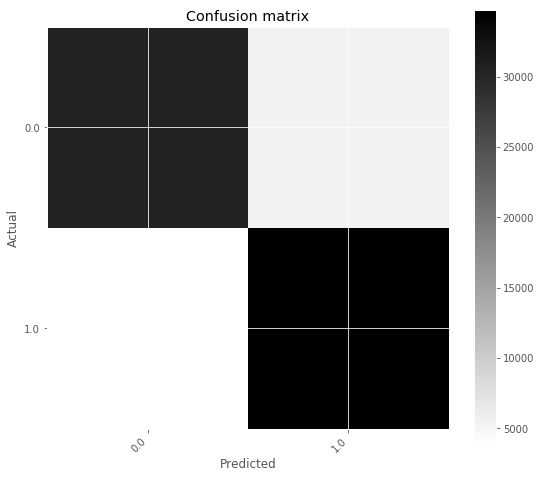

In [31]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
from pandas_confusion import ConfusionMatrix

def get_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top_a = coefs_with_fns[:n]
    top_b = coefs_with_fns[:-(n + 1):-1]
    return top_a, top_b

vect = vectorizer
y_pred = y_test_pred

top_a, top_b = get_most_informative_features(vect, clf, 100)
top_a_df = pd.DataFrame(top_a)
top_a_df.columns = ['coef', 'term']
top_b_df = pd.DataFrame(top_b)
top_b_df.columns = ['coef', 'term']

top_a_df.to_csv('./reports/url_uk_top100_soft.csv', index=False)
top_b_df.to_csv('./reports/url_uk_top100_hard.csv', index=False)

y_test_df = pd.DataFrame(test_df['hard_soft'], columns=['actual']).reset_index(drop=True)
y_test_df['predicted'] = y_pred
y_test_df.to_csv('./tests/url_uk_test_prediction.csv', index=False)

y_true = test_df['hard_soft'].values
confusion_matrix = ConfusionMatrix(y_true, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

confusion_matrix.plot()

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_true, y_pred)
conf_df = pd.DataFrame(conf)
conf_df.columns = clf.classes_
conf_df.index = clf.classes_
conf_df.to_csv('./reports/url_uk_test_confusion_matrix.csv', index_label="actual \ predicted")
print(conf_df)


### Proportion of Hard and Soft

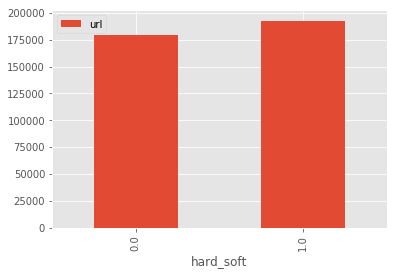

In [32]:
sdf.groupby(['hard_soft']).agg({'url': 'count'}).plot(kind='bar')

In [33]:
clf_pkl = 'models/url_uk_classifier.pkl'
vect_pkl = 'models/url_uk_vectorizer.pkl'

with open(clf_pkl, 'rb') as fid:
    clf = pickle.load(fid)

with open(vect_pkl, 'rb') as fid:
    vect = pickle.load(fid)
print(len(vect.vocabulary_))


37582


In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

out_df = pd.DataFrame()
i = 0
for df in pd.read_csv('/opt/notebooks/not_news/tabs/uk_news_media_data_subset_by_label.csv.gz', usecols=['date', 'sourceName', 'text', 'url', 'domain', 'label', 'articleId'], chunksize=100000, iterator=True):
    df['src_name'] = df['sourceName'].str.lower()
    del df['sourceName']
    X = vect.transform(df.text.astype(str))
    tfidf = TfidfTransformer()
    X = tfidf.fit_transform(X)
    y_pred = clf.predict(X)
    y_prob = clf.predict_proba(X)
    df['pred_label'] = y_pred
    df.loc[df.url.notnull(), 'soft_lab'] = df.loc[df.url.notnull(), 'url'].apply(lambda c: is_soft_lab(c))
    df.loc[df.url.notnull(), 'hard_lab'] = df.loc[df.url.notnull(), 'url'].apply(lambda c: is_hard_lab(c))
    df['pred_prob'] = y_prob[:, 1]
    df.loc[(df.hard_lab == 1) & df.soft_lab.isnull(), 'train_label'] = 1
    df.loc[df.hard_lab.isnull() & (df.soft_lab == 1), 'train_label'] = 0
    del df['soft_lab']
    del df['hard_lab']
    del df['text']
    out_df = out_df.append(df)
    del df
    del tfidf
    del X
    #print(i, out_df.memory_usage(deep=True))
    print(i)
    gc.collect()
    i += 1
    #if i > 10:
    #    break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


In [35]:
out_df.loc[:, 'pred_label'] = out_df.loc[:, 'pred_label'].astype(int)
out_df.head()

,url,articleId,date,domain,label,src_name,pred_label,pred_prob,train_label
0,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjonline&tCategory=news&itemid=NOED23%20Dec%202008%2009%3A41%3A39%3A63,en_20081223_becclesan6437_379770410001,2008-12-22,becclesandbungayjournal.co.uk,Beccles and Bungay Journal,beccles and bungay journal,0,0.447541,NaN
1,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjonline&tCategory=news&itemid=NOED08%20Jan%202010%2012%3A37%3A14%3A71,en_20100108_becclesan6437_844822170000,2010-01-08,becclesandbungayjournal.co.uk,Beccles and Bungay Journal,beccles and bungay journal,1,0.583057,NaN
2,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjonline&tCategory=news&itemid=NOED09%20Jun%202008%2010%3A09%3A10%3A98,en_20080609_becclesan6437_177751570001,2008-06-09,becclesandbungayjournal.co.uk,Beccles and Bungay Journal,beccles and bungay journal,1,0.790210,NaN
3,http://www.becclesandbungayjournal.co.uk/content/bbjournal/news/story.aspx?brand=BBJOnline&category=NEWS&tBrand=bbjonline&tCategory=news&itemid=NOED03%20Nov%202008%2010%3A03%3A33%3A76,en_20081103_becclesan6437_328210310001,2008-11-03,becclesandbungayjournal.co.uk,Beccles and Bungay Journal,beccles and bungay journal,1,0.809476,NaN
4,http://www.becclesandbungayjournal.co.uk/content/bbjournal/sport/story.aspx?brand=BBJOnline&category=SPORT&tBrand=bbjonline&tCategory=sport&itemid=NOED15%20May%202009%2010%3A52%3A14%3A91,en_20090515_becclesan6437_534951120000,2009-05-15,becclesandbungayjournal.co.uk,Beccles and Bungay Journal,beccles and bungay journal,0,0.193729,0.0


In [36]:
out_df.to_csv('./predicts/uk_media_url_pred.csv', index=False)

In [37]:
out_df.groupby(['src_name', 'pred_label']).agg({'url': 'count'})

url
src_name                           pred_label       
24dash                             0            2983
                                   1           40669
a world to win blogs               0             180
                                   1            1369
aberdeen independent               0             145
                                   1              42
agra-net.com                       0            6516
                                   1            7875
al-sharq al-awsat                  0            1044
                                   1           15194
alert net                          0             597
                                   1           14548
alliance for workers'' liberty     0             304
                                   1            1477
ananova                            0           12617
                                   1           66280
ananova - orange news              0            3823
                                   1            4173
andersontown news                  0            9859
                                   1           30673
andover advertiser                 0            2115
                                   1            5425
asharq al-awsat                    0              79
                                   1            2681
asharq alawsatt                    0             490
                                   1           16184
ayrshire post                      0            2874
                                   1            6328
bakery and snacks                  0            2430
                                   1            1361
...                                              ...
west sussex county times           0            1911
                                   1            1513
western mail                       0           25531
                                   1           50173
wharf                              0            2935
                                   1            2191
wiltshire news / this is wiltshire 0            5293
                                   1           11244
wimbledon guardian                 0              41
                                   1             169
wirral globe                       0             605
                                   1            1861
wisbech standard                   0            1719
                                   1            3387
woking news and mail               0              45
                                   1             521
wokingham times                    0            5289
                                   1            5638
worcester news                     0            4081
                                   1            5879
worksop guardian                   0            2514
                                   1            1336
world nuclear news                 0              31
                                   1            1010
worthing herald                    0            1003
                                   1            2093
yorkshire evening post             0            5895
                                   1           13920
yorkshire post                     0             232
                                   1             780

[688 rows x 1 columns]

In [38]:
out_df.groupby(['label', 'pred_label']).agg({'url': 'count'})

url
label                              pred_label        
24dash                             0             2983
                                   1            40669
A World to Win blogs               0              180
                                   1             1369
Agra-net.com                       0             6516
                                   1             7875
Al-Sharq al-Awsat                  0             1613
                                   1            34059
Alliance for Workers' Liberty      0              304
                                   1             1477
Ananova                            0            16440
                                   1            70453
Andover Advertiser                 0             2115
                                   1             5425
Ayrshire Post                      0             2874
                                   1             6328
BBC News                           0            19852
                                   1           100920
Bakery and Snacks                  0             2442
                                   1             1365
Ballyclare Gazette                 0              676
                                   1              570
Ballymena Times                    0             2603
                                   1             1735
Ballymoney Today                   0            13945
                                   1            11688
Banbridge Leader                   0            18395
                                   1            16416
Banbury Guardian                   0             9535
                                   1            27755
...                                               ...
West Sussex County Times           0             2139
                                   1             1939
Western Mail                       0            25531
                                   1            50173
Wharf                              0             2935
                                   1             2191
Wiltshire News / This Is Wiltshire 0             5293
                                   1            11244
Wirral Globe                       0              605
                                   1             1861
Wisbech Standard                   0             1719
                                   1             3387
Wokingham Times                    0             5289
                                   1             5638
Worcester News                     0             4081
                                   1             5879
Worksop Guardian                   0             2514
                                   1             1336
World Nuclear News                 0               31
                                   1             1010
Worthing Herald                    0             1003
                                   1             2093
Yorkshire Evening Post             0             5895
                                   1            13920
Yorkshire Post                     0              232
                                   1              780
Your Local Guardian                0             1652
                                   1             7505
enfieldindependent.co.uk           0             3683
                                   1             1967

[552 rows x 1 columns]

In [39]:
out_df.groupby(['domain', 'pred_label']).agg({'url': 'count'})

url
domain                   pred_label       
24dash.com               0            2983
                         1           40669
aawsat.com               0             450
                         1            2833
agra-net.com             0            6516
                         1            7875
alertnet.org             0            1288
                         1           66438
ananova.com              0            2039
                         1           52624
andoveradvertiser.co.uk  0            2115
                         1            5425
asharq-e.com             0             796
                         1           20280
asharqalawsat.com        0             367
                         1           10946
aworldtowin.net          0             180
                         1            1369
ayrshirepost.net         0            2729
                         1            5999
bakeryandsnacks.com      0            2442
                         1            1365
ballyclaregazette.co.uk  0             676
                         1             570
ballymenatimes.com       0            2603
                         1            1735
ballymoneytimes.co.uk    0           13945
                         1           11688
banbridgeleader.co.uk    0           18395
                         1           16416
...                                    ...
tyronetimes.co.uk        0             743
                         1            2937
walesonline.co.uk        0            9070
                         1           39774
wandsworthguardian.co.uk 0            5312
                         1            3336
wharf.co.uk              0            2189
                         1            1934
wirralglobe.co.uk        0             605
                         1            1861
wisbechstandard.co.uk    0            1719
                         1            3387
worcesternews.co.uk      0            4081
                         1            5879
workersliberty.org       0             304
                         1            1477
worksopguardian.co.uk    0             766
                         1             421
world-nuclear-news.org   0              31
                         1            1010
worthingherald.co.uk     0             920
                         1            1996
wscountytimes.co.uk      0             773
                         1             732
yorkpress.co.uk          0            3916
                         1            8607
yorkshirepost.co.uk      0            5895
                         1           13920
yourlocalguardian.co.uk  0            1652
                         1            7505

[582 rows x 1 columns]

In [40]:
out_df.groupby(['domain', 'pred_label']).agg({'url': 'count'})

url
domain                   pred_label       
24dash.com               0            2983
                         1           40669
aawsat.com               0             450
                         1            2833
agra-net.com             0            6516
                         1            7875
alertnet.org             0            1288
                         1           66438
ananova.com              0            2039
                         1           52624
andoveradvertiser.co.uk  0            2115
                         1            5425
asharq-e.com             0             796
                         1           20280
asharqalawsat.com        0             367
                         1           10946
aworldtowin.net          0             180
                         1            1369
ayrshirepost.net         0            2729
                         1            5999
bakeryandsnacks.com      0            2442
                         1            1365
ballyclaregazette.co.uk  0             676
                         1             570
ballymenatimes.com       0            2603
                         1            1735
ballymoneytimes.co.uk    0           13945
                         1           11688
banbridgeleader.co.uk    0           18395
                         1           16416
...                                    ...
tyronetimes.co.uk        0             743
                         1            2937
walesonline.co.uk        0            9070
                         1           39774
wandsworthguardian.co.uk 0            5312
                         1            3336
wharf.co.uk              0            2189
                         1            1934
wirralglobe.co.uk        0             605
                         1            1861
wisbechstandard.co.uk    0            1719
                         1            3387
worcesternews.co.uk      0            4081
                         1            5879
workersliberty.org       0             304
                         1            1477
worksopguardian.co.uk    0             766
                         1             421
world-nuclear-news.org   0              31
                         1            1010
worthingherald.co.uk     0             920
                         1            1996
wscountytimes.co.uk      0             773
                         1             732
yorkpress.co.uk          0            3916
                         1            8607
yorkshirepost.co.uk      0            5895
                         1           13920
yourlocalguardian.co.uk  0            1652
                         1            7505

[582 rows x 1 columns]

In [41]:
out_df.shape

(5392953, 9)

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

In [43]:
out_df['norm_date'] = pd.to_datetime(out_df['date'], format='%Y-%m-%d').astype(int) / 1000.0
scaler = MinMaxScaler(feature_range=(0, 1))
out_df['norm_date'] = scaler.fit_transform(out_df[['norm_date']])

In [44]:
out_df[['src_name', 'date', 'norm_date', 'pred_prob']]

,src_name,date,norm_date,pred_prob
0,beccles and bungay journal,2008-12-22,0.493774,0.447541
1,beccles and bungay journal,2010-01-08,0.580258,0.583057
2,beccles and bungay journal,2008-06-09,0.449400,0.790210
3,beccles and bungay journal,2008-11-03,0.482681,0.809476
4,beccles and bungay journal,2009-05-15,0.526375,0.193729
5,beccles and bungay journal,2007-05-24,0.362916,0.512569
6,beccles and bungay journal,2009-03-28,0.515508,0.020062
7,beccles and bungay journal,2010-01-13,0.581390,0.207929
8,beccles and bungay journal,2007-07-26,0.377179,0.597845
9,beccles and bungay journal,2009-12-16,0.575051,0.382439


In [45]:
src_lr_coef = []
for s in out_df.src_name.unique():
    tmp_df = out_df.loc[out_df.src_name == s, ['date', 'pred_prob']]
    tmp_df['norm_date'] = pd.to_datetime(tmp_df['date'], format='%Y-%m-%d').astype(int) / 1000.0
    scaler = MinMaxScaler(feature_range=(0, 1))
    tmp_df['norm_date'] = scaler.fit_transform(tmp_df[['norm_date']])
    lr = linear_model.LinearRegression()
    lr.fit(tmp_df[['norm_date']], tmp_df['pred_prob'])
    src_lr_coef.append((s, lr.coef_[0]))
    #break

In [46]:
src_lr_coef_df = pd.DataFrame(src_lr_coef, columns=['src', 'coef'])
src_lr_coef_df

,src,coef
0,beccles and bungay journal,0.112351
1,southern daily echo,-0.181482
2,berwick today,-0.013459
3,wokingham times,-0.001743
4,birmingham mail,0.541070
5,lancashire evening post,0.224824
6,belfast telegraph,-0.229581
7,essex chronicle,-0.262354
8,chingford guardian,0.128667
9,the daily mail,0.083544


In [47]:
src_lr_coef_df.describe()

,coef
count,345.000000
mean,0.002402
std,0.200805
min,-0.619581
25%,-0.102115
50%,-0.008259
75%,0.101957
max,0.642612


In [48]:
src_lr_coef_df.to_csv('/opt/notebooks/not_news/tabs/lr_year_pred_prob_coef_by_source.csv', index=False)

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

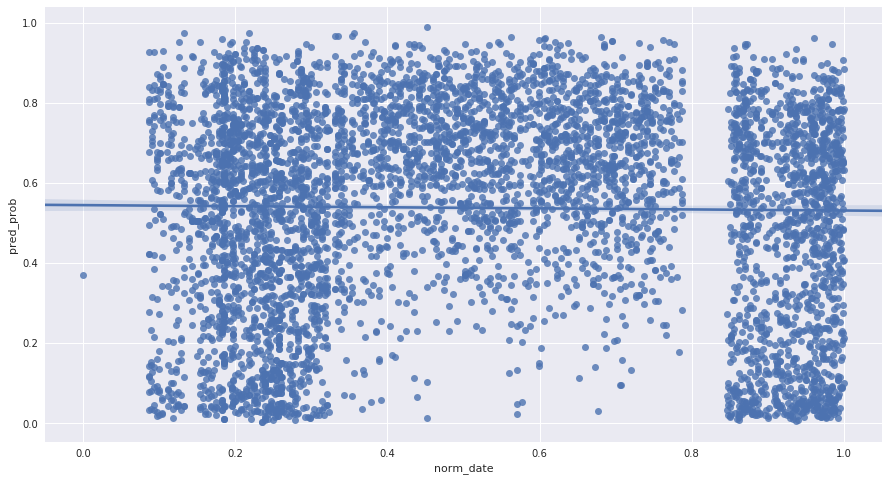

In [50]:
tmp_df = out_df.loc[out_df.src_name == 'berwick today', ['date', 'pred_prob']]
tmp_df['norm_date'] = pd.to_datetime(tmp_df['date'], format='%Y-%m-%d').astype(int) / 1000.0
scaler = MinMaxScaler(feature_range=(0, 1))
tmp_df['norm_date'] = scaler.fit_transform(tmp_df[['norm_date']])
plt.figure(figsize=(15, 8))
sns.regplot(x='norm_date', y='pred_prob', data=tmp_df)

In [51]:
for s in out_df.src_name.unique():
    tmp_df = out_df.loc[out_df.src_name == s, ['norm_date', 'pred_prob']]
    lr = linear_model.LinearRegression()
    lr.fit(tmp_df[['norm_date']], tmp_df['pred_prob'])
    print(s, lr.coef_[0])
    break

beccles and bungay journal 0.38232364827516613
